In [1]:
import pandas_datareader.data as pdr

def get_stock_data(code):
  df = pdr.DataReader("{}.JP".format(code), "stooq").sort_index()
  return df

In [2]:
!pip install mplfinance

     |████████████████████████████████| 70 kB 8.4 MB/s 


In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib

In [ ]:
import talib as ta

df = get_stock_data(5401)   # 日本製鉄
close = df["Close"]

df["ma5"] = ta.SMA(close, timeperiod=5)
df["ma25"] = ta.SMA(close, timeperiod=25)

cross  = df["ma5"] > df["ma25"]
df["cross"] = cross
df

,Open,High,Low,Close,Volume,ma5,ma25,cross
Date,,,,,,,,
2017-05-16,2145.44,2149.83,2131.81,2145.44,4165077,NaN,NaN,False
2017-05-17,2132.69,2135.32,2114.22,2117.74,2694359,NaN,NaN,False
2017-05-18,2089.17,2111.59,2082.15,2092.24,4840316,NaN,NaN,False
2017-05-19,2098.40,2137.95,2087.85,2131.81,4718032,NaN,NaN,False
2017-05-22,2170.94,2211.38,2165.21,2205.65,5509755,2138.576,NaN,False
...,...,...,...,...,...,...,...,...
2022-03-11,1990.36,2055.30,1989.39,2039.30,7881446,1986.382,1984.7936,True
2022-03-14,2047.06,2091.64,2031.55,2073.23,6676289,1991.908,1993.7688,False
2022-03-15,2045.12,2054.81,2008.77,2019.92,7750211,2013.522,1999.4292,True


In [ ]:
cross_shift = cross.shift(1)
# ゴールデンクロスの発生日
temp_gc = (cross != cross_shift) & (cross == True)
# デッドクロスの発生日
temp_dc  = (cross != cross_shift) & (cross == False)

In [ ]:
import numpy as np

# ゴールデンクロス発生日であればMA5の値、それ以外はNaN
gc = [m if g == True else np.nan for g, m in zip(temp_gc, ma5)]

# デッドクロス発生日であればMA25の値、それ以外はNan
dc = [m if d == True else np.nan for d, m in zip(temp_dc, ma25)]

# データフレームのカラムとして保存
df["gc"], df["dc"] = gc, dc

In [ ]:
df

,Open,High,Low,Close,Volume,ma5,ma25,cross,gc,dc
Date,,,,,,,,,,
2017-03-22,2321.84,2340.70,2294.90,2316.01,4456927,NaN,NaN,False,NaN,NaN
2017-03-23,2338.00,2348.80,2306.57,2321.39,3349042,NaN,NaN,False,NaN,NaN
2017-03-24,2320.04,2351.49,2307.03,2336.20,3499342,NaN,NaN,False,NaN,NaN
2017-03-27,2298.94,2308.37,2284.56,2293.55,3272220,NaN,NaN,False,NaN,NaN
2017-03-28,2316.01,2333.97,2305.69,2317.79,3618692,2316.988,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-03-11,2053.50,2120.50,2052.50,2104.00,7639100,2049.400,2047.76,True,NaN,NaN
2022-03-14,2112.00,2158.00,2096.00,2139.00,6471000,2055.100,2057.02,False,NaN,2057.02
2022-03-15,2110.00,2120.00,2072.50,2084.00,7511900,2077.400,2062.86,True,2077.4,NaN


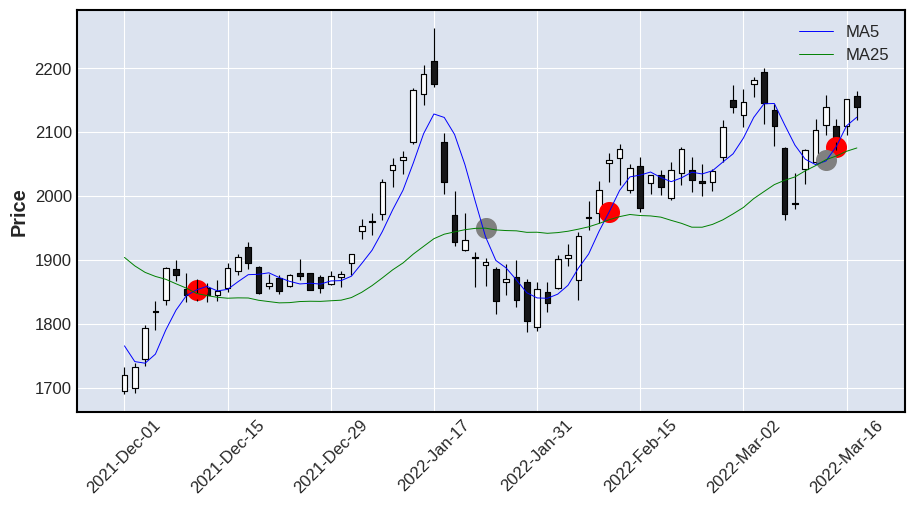

In [ ]:
import mplfinance as mpf
import datetime as dt

rdf = df[dt.datetime(2021,12,1):dt.datetime(2022,3,31)]

apd  = [
          # 5日移動平均線
          mpf.make_addplot(rdf['ma5'], color="blue", panel=0, width=0.7),
          # 25日移動平均線
          mpf.make_addplot(rdf['ma25'], color="green", panel=0, width=0.7),
          mpf.make_addplot(rdf["gc"], type="scatter", 
                              markersize=200, marker="o", color="red"),
          mpf.make_addplot(rdf["dc"], type="scatter", 
                               markersize=200, marker="o", color="gray"),
      ]

fig, axes = mpf.plot(rdf, type="candle", figratio=(2,1), 
                     addplot=apd, returnfig=True)
axes[0].legend(["MA5", "MA25"])
fig.show()

In [ ]:
# zip関数のサンプル
names = ["alice", "scott", "morris"]
scores = [50, 40, 60]
for name, score in zip(names, scores):
  print("{} : {}". format(name, score))

In [ ]:
# リスト内包表記のサンプル
numbers = [1,2,3,4,5]

twice_numbers = [n * 2 for n in numbers]
twice_numbers

In [ ]:
twice_numbers = []
for n in numbers:
  twice_numbers.append(n * 2)

twice_numbers